# **Website of The Grocery Store Chain**
___________________________


### **Experimentation and A/B Testing Project**
- You are an analyst for a large grocery chain.
- One of your company’s goals is to drive more customers to download our mobile app and register for the loyalty program.
- Your manager is curious if changing the link to a button of the app store will improve the user’s ability to download the app.
- Your manager asks you to create an A/B testing plan for changing the link to a button of the app store with the expectation it will the user’s interest to download the app.

### **Data Quality**

#### Import Data

First, we must import the data.
- Grocery website is stord in `.csv` named `grocerywebsiteabtestdata.csv`
- Import data into python with `pd.read_csv(...)` to start analysis

In [1]:
#load data
import pandas as pd
import numpy as np

#visualization
import matplotlib.pyplot as plt

In [2]:
#initialization filename
filename = "grocerywebsiteabtestdata.csv"

#import data
data = pd.read_csv(filename)

#display 10 top rows of the data
data.head(10)

,RecordID,IP Address,LoggedInFlag,ServerID,VisitPageFlag
0,1,39.13.114.2,1,2,0
1,2,13.3.25.8,1,1,0
2,3,247.8.211.8,1,1,0
3,4,124.8.220.3,0,3,0
4,5,60.10.192.7,0,2,0
5,6,23.5.199.2,1,3,0
6,7,195.12.126.2,1,1,0
7,8,97.6.126.6,0,3,1
8,9,93.10.165.4,1,1,0
9,10,180.3.76.4,1,1,0


- There are 5 column (`RecordID`, `IP Address`, `LoggedInFlag`, `ServerID`, `VisitPageFlag`)
- `RecordID` : identifier of the row of data
- `IP Address` : address of the user, who is visiting website
- `LoggedInFlag` : 1 - when user has an account and logged in
- `ServerID` : one of the servers user was routed through
- `VisitPageFlag` : 1 - when user clicked on the loyalty program page

In [3]:
#overview data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184588 entries, 0 to 184587
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   RecordID       184588 non-null  int64 
 1   IP Address     184588 non-null  object
 2   LoggedInFlag   184588 non-null  int64 
 3   ServerID       184588 non-null  int64 
 4   VisitPageFlag  184588 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 7.0+ MB


In [4]:
#dimension of data
data.shape

(184588, 5)

In [5]:
data.describe()

,RecordID,LoggedInFlag,ServerID,VisitPageFlag
count,184588.000000,184588.000000,184588.000000,184588.000000
mean,92294.500000,0.503657,1.999691,0.058184
std,53286.110082,0.499988,0.816719,0.234091
min,1.000000,0.000000,1.000000,0.000000
25%,46147.750000,0.000000,1.000000,0.000000
50%,92294.500000,1.000000,2.000000,0.000000
75%,138441.250000,1.000000,3.000000,0.000000
max,184588.000000,1.000000,3.000000,1.000000


#### Missing Value

In [6]:
#checking missing value
data.isna().sum()

RecordID         0
IP Address       0
LoggedInFlag     0
ServerID         0
VisitPageFlag    0
dtype: int64

- There is no missing value.

#### Uniqueness

An IP Address may have visited the page more than once. So, we must to check duplicate data on IP Address.

In [7]:
#checking duplicate data 
data.duplicated(['IP Address']).sum()

85072

In [8]:
#droping duplicates data
data.drop_duplicates(subset='IP Address', inplace=True)
data.shape

(99516, 5)

- Now, we have 99516 total records with no duplicates and data ready for analysis.

In [9]:
#display 10 top rows of the data
data.head(10)

,RecordID,IP Address,LoggedInFlag,ServerID,VisitPageFlag
0,1,39.13.114.2,1,2,0
1,2,13.3.25.8,1,1,0
2,3,247.8.211.8,1,1,0
3,4,124.8.220.3,0,3,0
4,5,60.10.192.7,0,2,0
5,6,23.5.199.2,1,3,0
6,7,195.12.126.2,1,1,0
7,8,97.6.126.6,0,3,1
8,9,93.10.165.4,1,1,0
9,10,180.3.76.4,1,1,0


#### Distribution of Data

Split the dataset into `Control` and `Treatment` groups.

In [10]:
#length of ServerID when value 1
len(data[data['ServerID']==1])

33229

In [11]:
#length of ServerID when value 2
len(data[data['ServerID']==2])

33105

In [12]:
#length of ServerID when value 3
len(data[data['ServerID']==3])

33182

In [64]:
#compare each ServerID with VisitPageFlag
serverID_with_visitPage = pd.crosstab(data["ServerID"], data['VisitPageFlag'])
serverID_with_visitPage

VisitPageFlag,0,1
ServerID,,
1,30938,2291
2,31359,1746
3,31461,1721


We will set ServerID = 1 as `Treatment` Group and ServerID = 2 and 3 as `Control` Group

In [14]:
data['Group'] = np.where(data['ServerID'] == 1, 'Treatment', 'Control')
data.head()

,RecordID,IP Address,LoggedInFlag,ServerID,VisitPageFlag,Group
0,1,39.13.114.2,1,2,0,Control
1,2,13.3.25.8,1,1,0,Treatment
2,3,247.8.211.8,1,1,0,Treatment
3,4,124.8.220.3,0,3,0,Control
4,5,60.10.192.7,0,2,0,Control


In [27]:
#length of Control Group
n_control = len(data[data['Group']=='Control'])
n_control

66287

In [18]:
#length of Treatment Group
n_treatment = len(data[data['Group']=='Treatment'])
n_treatment

33229

*Calculate of sample size = 
n = 16(0.5)2 / 0.022  = 10.000 users in each variant*

From calculating of sample size, we get 10.000 users in each variant. So we can sample using Simple Random Sampling in this dataset.

In [30]:
#initialization the number of sample
n = 10_000

In [35]:
#choose sample on control
sample_data_control = data[data['Group']=='Control'].sample(n = n,
                                                              replace = False)
#show sample on control
sample_data_control

,RecordID,IP Address,LoggedInFlag,ServerID,VisitPageFlag,Group
135000,135001,243.5.202.7,0,2,0,Control
44845,44846,72.7.46.5,1,3,0,Control
40059,40060,27.15.12.3,1,2,0,Control
18965,18966,28.3.179.9,1,3,0,Control
45416,45417,137.2.139.9,1,2,0,Control
...,...,...,...,...,...,...
168985,168986,107.8.191.4,0,2,0,Control
69513,69514,143.4.220.9,1,3,0,Control
153595,153596,155.5.105.7,0,3,0,Control
11103,11104,212.3.6.7,0,2,0,Control


In [38]:
#choose sample on treatment
sample_data_treatment = data[data['Group']=='Treatment'].sample(n = n,
                                                              replace = False)
#show sample on treatment
sample_data_treatment

,RecordID,IP Address,LoggedInFlag,ServerID,VisitPageFlag,Group
26601,26602,10.4.140.6,0,1,0,Treatment
55134,55135,56.14.208.1,0,1,0,Treatment
168350,168351,185.11.171.3,0,1,1,Treatment
85390,85391,196.1.96.9,0,1,1,Treatment
48127,48128,189.8.72.2,1,1,0,Treatment
...,...,...,...,...,...,...
183002,183003,251.11.185.9,0,1,0,Treatment
1831,1832,111.0.9.3,0,1,0,Treatment
97123,97124,250.2.228.2,0,1,0,Treatment
126537,126538,235.0.18.6,1,1,0,Treatment


Calculate Click-Through-Rate

<center>

|Group|#User|#CTR|CTR Rate
|:--|:--:|:--:|:--:|
|Control|10.000|-|-|
|Treatment|10.000|-|-|

</center>

In [43]:
#find control group that is CTR
data_control_ctr = sample_data_control[(sample_data_control['VisitPageFlag'] == 1)]

#length of CTR on control group
n_control_ctr = len(data_control_ctr)
n_control_ctr

525

In [46]:
#find treatment group that is CTR
data_treatment_ctr = sample_data_treatment[(sample_data_treatment['VisitPageFlag'] == 1)]

#length of CTR on treatment group
n_treatment_ctr = len(data_treatment_ctr)
n_treatment_ctr

710

In [65]:
#merge sample data control and treatment
data_sample = pd.concat([sample_data_control, sample_data_treatment], ignore_index=True)

#comparing the Control and Treatment Group on VisitPageFlag
group_with_visitPage = pd.crosstab(data_sample['Group'], data_sample['VisitPageFlag'], margins=True)
group_with_visitPage

VisitPageFlag,0,1,All
Group,,,
Control,9475,525,10000
Treatment,9290,710,10000
All,18765,1235,20000


Text(0, 0.5, 'Frequency')

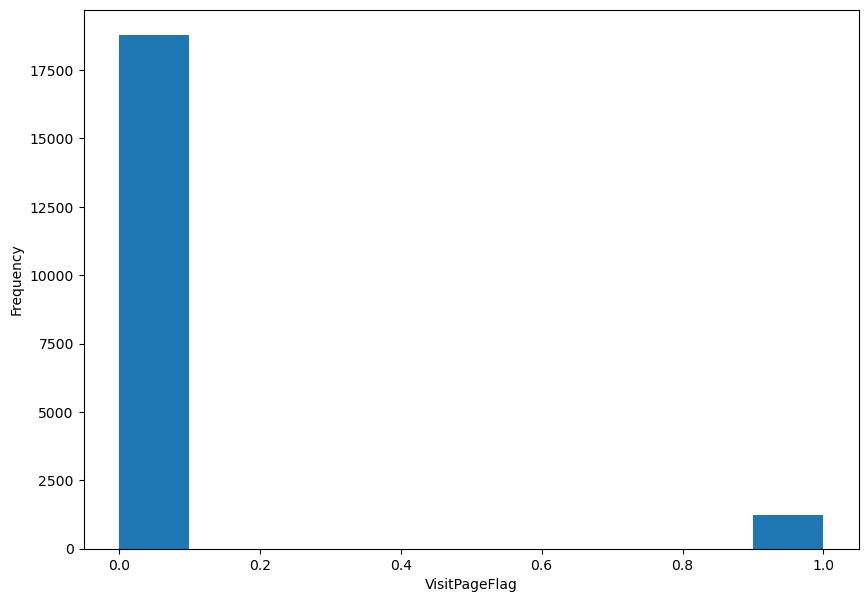

In [71]:
#Make histogram on data_sample
#bins = 10
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(data_sample['VisitPageFlag'],bins=10)
 
# Show plot
plt.xlabel('VisitPageFlag')
plt.ylabel('Frequency')

Finally, calculate CTR on each group

In [72]:
#CTR control group
ctr_control = n_control_ctr / n
ctr_control

0.0525

In [74]:
#CTR treatment group
ctr_treatment = n_treatment_ctr / n
ctr_treatment

0.071

<center>

|Group|#User|#CTR|CTR Rate
|:--|:--:|:--:|:--:|
|Control|10.000|525|0.0525|
|Treatment|10.000|710|0.071|

</center>

On Visualization

C:\Users\UYUN\AppData\Local\Temp\ipykernel_12304\3857991313.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=["Control", "Treatment"], fontsize=14)


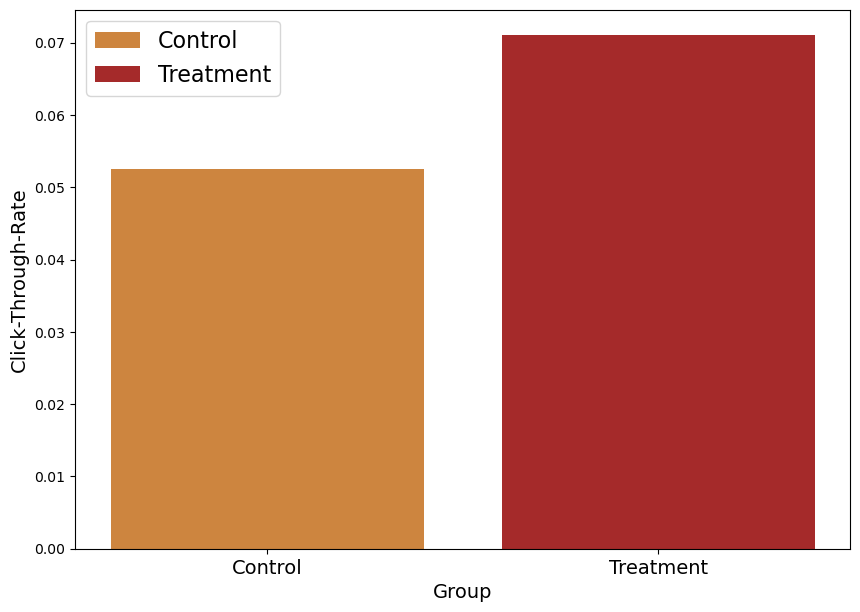

In [75]:
#compare visualization CTR each variant
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,7))

#make plot
ax.bar("Control", ctr_control, color="peru", label="Control")
ax.bar("Treatment", ctr_treatment, color="brown", label="Treatment")

#styling plot
ax.set_ylabel("Click-Through-Rate", fontsize=14)
ax.set_xlabel("Group", fontsize=14)
ax.set_xticklabels(labels=["Control", "Treatment"], fontsize=14)
ax.legend(fontsize=16)
plt.show()

#### Sample Ratio Mismatch (SRM)

We will detect the SRM using chi-square test

*Pre-Analysis*

- Before doing the chi-square test, let's fill in the following table to make it easier to detect the presence of SRM.

<center>

|Group|#User|#CTR|CTR Rate|Percentage|
|:--|:--:|:--:|:--:|:--:|
|Control|10.000|525|0.0525|-|
|Treatment|10.000|710|0.071|-|

</center>

* Percentage is the percentage of sample size in each group

In [96]:
# Number of users in the control group
n_control = sample_data_control.shape[0]

n_control

10000

In [97]:
# Number of users in the treatment group
n_treatment = sample_data_treatment.shape[0]

n_treatment

10000

In [99]:
# Percentage in each group
n_total = data_sample.shape[0]
persen_control = n_control/n_total * 100
persen_treat = n_treatment/n_total * 100

print(f"% control   : {persen_control:.2f}%")
print(f"% treatment : {persen_treat:.2f}%")

% control   : 50.00%
% treatment : 50.00%


- We get
<center>

|Group|#User|#CTR|CTR Rate|Percentage|
|:--|:--:|:--:|:--:|:--:|
|Control|10.000|525|0.0525|50.00%|
|Treatment|10.000|710|0.071|50.00%|

</center>

#### Chi-Square Test for Detect SRM

The steps for doing a chi-square test in order to detect SRM are:

**1. Define the null and alternative hypothesis ($H_0$ and $H_1$)**

$H_0$  : No SRM detected

$H_1$  : SRM detected

**2. Calculate chi-square statistics**

$$ \chi^2 = \sum \frac{\left ( \text{observed - expected} \right )^2}{\text{expected}} $$

Where :
- Observed: the control and variation traffic volumes (sample size), respectively
- Expected: the expected values for control and treatment — i.e. the total observed divided by 2

Observed is the same as #user in each group.

For calculate expexted in each group, we can use total observed divided by 2

In [100]:
observed = [n_control, n_treatment]
total_traffic= sum(observed)
expected = [ total_traffic/2, total_traffic/2 ]

Then we can calculate the chi-square statistics using the function in the `scipy` library, namely `chisquare` with steps: 

1. import library
    - from scipy.stats import chisquare
2. Use the function `chisquare(f_obs, f_exp=...)`
    - `f_obs`: Observed frequencies in each category (array)
    - `f_exp`: Expected frequencies in each category. By default the categories are assumed to be equally likely.

In [101]:
#calculate chi-square statistics
from scipy.stats import chisquare
chi = chisquare(observed, f_exp=expected)
print(chi)

Power_divergenceResult(statistic=0.0, pvalue=1.0)


**3. Define decision rules**

In making statistical test decisions, we can use:
- Comparison of chi-square statistics with critical value
     -  $\chi^2 > \chi^2_{\alpha,df}$ → reject $H_0$

- Comparison of p-value with alpha
   - pvalue < $\alpha$ → reject $H_0$


Normally, one would look for a p-value of 0.05 or less to proof of SRM. The problem with 0.05 is that it’s not strict enough for our purposes. Using this might give us a false signal. What we need is to be stricter for our test. So we use significance level 1%.

degree of freedom (df) is calculated as: 
$$ df = (rows − 1) × (columns − 1) $$ 


In [102]:
# Comparison of chi-square statistics with critical value
# We must calculate the critical first

# critical value is the chi-square value at alpha
alpha = 0.05
df=(2-1)*(2-1)  

import scipy
chi_critical = scipy.stats.chi2.ppf(1 - alpha, df)
print(f"Critical value: {chi_critical:.3f}")

Critical value: 3.841


In [103]:
#Make decisions from chi-square statistics and critical value
if chi[0] > chi_critical:
  print("Reject H0 : SRM may be present.")
else:
  print("Fail to reject H0 : No SRM")

Fail to reject H0 : No SRM


In [104]:
# Comparison of P-Value with alpha.
if chi[1] < 0.01:
    print('Reject H0 : SRM may be present.')
else:
    print('Fail to reject H0 : No SRM.')

Fail to reject H0 : No SRM.


Based on the detection of SRM, SRM was not detected.

#